# Dispatchable Renewable Electricity Offers Higher Energy Return on Investment than Carbon Capture and Storage Under Realistic Conditions 
*Sgouridis, Carbajales-Dale, Csala, Chiesa, Bardi*

Use this Jupyter workbook to reproduce all results presented in the paper.

<p>This is document has been created using  <a target="_blank" href="http://jupyter.org/">Jupyter Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.

Import dependencies

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
import matplotlib.lines as lines
%matplotlib inline
import sys, string
from sympy import *
init_printing() 
print 'Running on Python',sys.version

Running on Python 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]


### Fossil fuels part

#### Equations

In [2]:
var('EROEI E_out E_in');
eq_S1=Eq(EROEI,E_out/E_in)
eq_S1

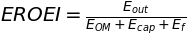

In [3]:
var('E_cap E_f E_OM');
eq_S1i=Eq(EROEI,E_out/(E_cap+E_OM+E_f))
eq_S1i

In [4]:
var('L s_OM');
eq_S2i=Eq(E_in,E_cap*(1+L*s_OM)+E_f)
eq_S2i

In [5]:
var('P L cf');
eq_S2ii=Eq(E_out,P*cf*L)
eq_S2ii

In [6]:
var('E_el');
eq_S2iii=Eq(E_out,E_el)
eq_S2iii

In [7]:
e=Symbol('eta')
var('E_th');
eq_S2iv=Eq(E_th,P*cf*L/e)
eq_S2iv

In [8]:
var('EROEI_th');
eq_S3i=Eq(E_f,E_th/EROEI_th)
eq_S3i

In [9]:
#define pretty variable substituion function
def sub(var,eq):
    return [var,solve(eq,var)[0]]
#create multiple substituion method by chaining
def multisub(eq0,msub):
    for i in range(len(msub)/2):
        eq0=eq0.subs([sub(msub[i*2],msub[i*2+1])])
    return eq0

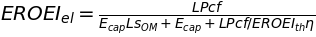

In [10]:
var('EROEI_el');
eq_S3=Eq(EROEI_el,multisub(eq_S1,[E_out,eq_S2ii,E_in,eq_S2i,E_f,eq_S3i,E_th,eq_S2iv]).rhs)
eq_S3

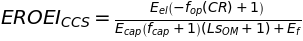

In [11]:
var('CR f_op EROEI_CCS f_cap');
eq_S4=Eq(EROEI_CCS,E_el*(1-f_op(CR))/(E_cap*(1+f_cap)*(1+L*s_OM)+E_f))
eq_S4

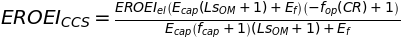

In [12]:
var('CR f_op EROEI_CCS f_cap');
eq_S5=Eq(EROEI_CCS,(1-f_op(CR))*(E_cap*(1+L*s_OM)+E_f)*EROEI_el/(E_cap*(1+f_cap)*(1+L*s_OM)+E_f))
eq_S5

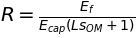

In [13]:
var('R');
eq_S6i=Eq(R,E_f/(E_cap*(1+L*s_OM)))
eq_S6i

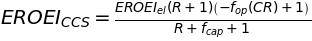

In [14]:
eq_S6=Eq(EROEI_CCS,(1-f_op(CR))*(R+1)*EROEI_el/(R+1+f_cap))
eq_S6

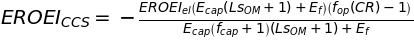

In [15]:
eq_S5.simplify()

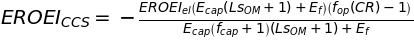

In [16]:
eq_S6.subs(R,eq_S6i.rhs).simplify()

In [17]:
#eq_S6 is correct!
eq_S6.subs(R,eq_S6i.rhs).simplify()==eq_S5.simplify()

True

#### Simulation

Using the formula in Eq.4 and the plant values from the Table S1 calculate the $EROEI_{el}$ for all capacity factors $CF$s between 50 and 90. We then use these values as a proxy to create an a adjustment factor for the $EROEI_{el}$ due to the indirect effect of the change of the capacity factor.

In [18]:
CFs=[50,55,60,65,70,75,80,85,90,95,100]
EROEI_els=[[8.8,9.2,8.8,10.7,11,26],
[9.2,9.6,9.2,11.2,11.5,27],
[9.6,10.1,9.7,11.6,12,27.8],
[10,10.5,10.1,12,12.4,28.6],
[10.3,10.8,10.5,12.4,12.8,29.3],
[10.7,11.1,10.8,12.7,13.2,29.9],
[11,11.5,11.2,13,13.5,30.5],
[11.2,11.7,11.5,13.3,13.8,31],
[11.5,12,11.8,13.5,14.1,31.5],
[11.73,12.25,12.07,13.76,14.36,31.98],
[11.96,12.48,12.33,13.98,14.61,32.39]]

In [19]:
df=pd.DataFrame(EROEI_els).T
df.columns=CFs
df.index.name='Plant #'
df.columns.name='CF'
df.index=['IGCC 1','IGCC 3','IGCC 5','PC 9','PC 11','NGCC 13']

In [20]:
df

CF,50,55,60,65,70,75,80,85,90,95,100
IGCC 1,8.8,9.2,9.6,10.0,10.3,10.7,11.0,11.2,11.5,11.73,11.96
IGCC 3,9.2,9.6,10.1,10.5,10.8,11.1,11.5,11.7,12.0,12.25,12.48
IGCC 5,8.8,9.2,9.7,10.1,10.5,10.8,11.2,11.5,11.8,12.07,12.33
PC 9,10.7,11.2,11.6,12.0,12.4,12.7,13.0,13.3,13.5,13.76,13.98
PC 11,11.0,11.5,12.0,12.4,12.8,13.2,13.5,13.8,14.1,14.36,14.61
NGCC 13,26.0,27.0,27.8,28.6,29.3,29.9,30.5,31.0,31.5,31.98,32.39


In [21]:
df=df.T
df['IGCC']=(df['IGCC 1']+df['IGCC 3']+df['IGCC 5'])/3.0
df['PC']=(df['PC 9']+df['PC 11'])/2.0
df['NGCC']=df['NGCC 13']
cf_table=df[['NGCC','PC','IGCC']].T

In [22]:
cf_table.T

,NGCC,PC,IGCC
CF,,,
50,26.00,10.850,8.933333
55,27.00,11.350,9.333333
60,27.80,11.800,9.800000
65,28.60,12.200,10.200000
70,29.30,12.600,10.533333
75,29.90,12.950,10.866667
80,30.50,13.250,11.233333
85,31.00,13.550,11.466667
90,31.50,13.800,11.766667


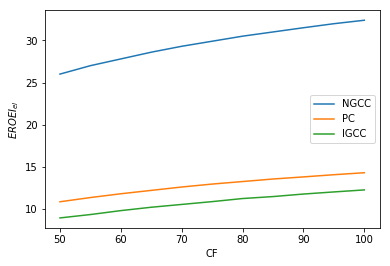

In [23]:
cf_table.T.plot()
plt.ylabel('$EROEI_{el}$')
plt.show()

Capacity factor conversion ratio

In [24]:
def cf_conversion_ratio(plant,EROEI,CF,reference_CF_level=100):
    if plant not in cf_table.index:
        if plant=='NGCC\nGas':plant='NGCC'
        elif plant=='Pulverized\nCoal':plant='PC'
        elif plant=='IGCC\nCoal':plant='IGCC' 
        else: 
            print 'no plant',plant
            return
    df=cf_table.loc[[plant]]
    return (EROEI*1.0*df[CF]/df[reference_CF_level]).values[0]

In [25]:
cf_conversion_ratio('NGCC\nGas',30,55),cf_conversion_ratio('NGCC',30,85)

In [26]:
cf_conversion_ratio('IGCC',13,55),cf_conversion_ratio('IGCC',13,85)

In [27]:
cf_conversion_ratio('PC',13,55),cf_conversion_ratio('PC',13,85)

We need to create a energy penalty conversion ratio for the Capture ratio $CR$. We use the Energy penalty figure S1. We then use this value to adjust the fvalue of the operational energy penalty $f_{op}$.

|CR | energy penalty  |
|--|--|
|60| 7.8  |
|90| 11.8|

In [28]:
CR=[90,60]
CR_ratio=[1, 7.8/11.8]
CR_ratio

Define $EROEI_{CCS}$ calcuator function `eroei_ccs_cycler`, including minimums and maximums over $f_{op}$ and $f_{cap}$.

In [60]:
def eroei_ccs_cycler(names, eroei_els, t0s, CF, R, CR_ratio, fop, fcap, verbose=False):
    eroei_ccs=np.zeros([len(names),len(CF),len(CR_ratio),len(fop),len(fcap)])
    eroei_ccs_min=np.zeros([len(names),len(CF),len(CR_ratio)])+1000
    eroei_ccs_max=np.zeros([len(names),len(CF),len(CR_ratio)])
    eroei_el_cf=np.zeros([len(names),len(CF)])
    for i in range(len(names)):
        if verbose: print('Calculating '+names[i].replace('\n',' ')+'...')
        for j in range(len(CF)):
            #convert base EROEI to EROEI_el using the CF converstion table
            eroei_el_cf[i][j]=cf_conversion_ratio(names[i],eroei_els[i],CF[j])
            for r in range(len(CR_ratio)):
                for k in range(len(fop)):
                    for l in range(len(fcap)):
                        #calculate eoris over maps using eq_S6
                        eroei_ccs[i][j][r][l,k]=(1-fop[k]*CR_ratio[r]/100.0)*\
                            ((R[i][j]+1)/(R[i][j]+1+fcap[l]/100.0))*\
                            eroei_el_cf[i][j] #*CF[j]/100.0 - not needed as it is embedded in the EROEI now

                        #calculate min-maxes
                        for t0x in range(len(t0s[i])/2):
                            for t0y in range(len(t0s[i])/2,len(t0s[i])):
                                x=t0s[i][t0x]
                                y=t0s[i][t0y]
                                if ((abs(fop[k]-x)<0.5)and(abs(fcap[l]-y)<1.5)):
                                    eroei_ccs_max[i][j][r]=max(eroei_ccs_max[i][j][r],eroei_ccs[i][j][r][l,k])
                                    eroei_ccs_min[i][j][r]=min(eroei_ccs_min[i][j][r],eroei_ccs[i][j][r][l,k])
                if verbose:
                    print('CF='+str(CF[j])+', CR='+str(CR[r])+\
                      ', EROEI_el_CF_100%='+str(eroei_els[i])+\
                      ', EROEI_el_CF_'+str(CF[j])+'%='+str(np.round(eroei_el_cf[i][j],2))+\
                      ', EROEI_CCS - min='+str(np.round(eroei_ccs_min[i][j][r],2))+\
                      ', max='+str(np.round(eroei_ccs_max[i][j][r],2)))
    return eroei_el_cf, eroei_ccs, eroei_ccs_min, eroei_ccs_max

Plot with relative $EROEI_{CCS}$ values, as percentages of base $EROEI$ for easy comparison across fuel types.

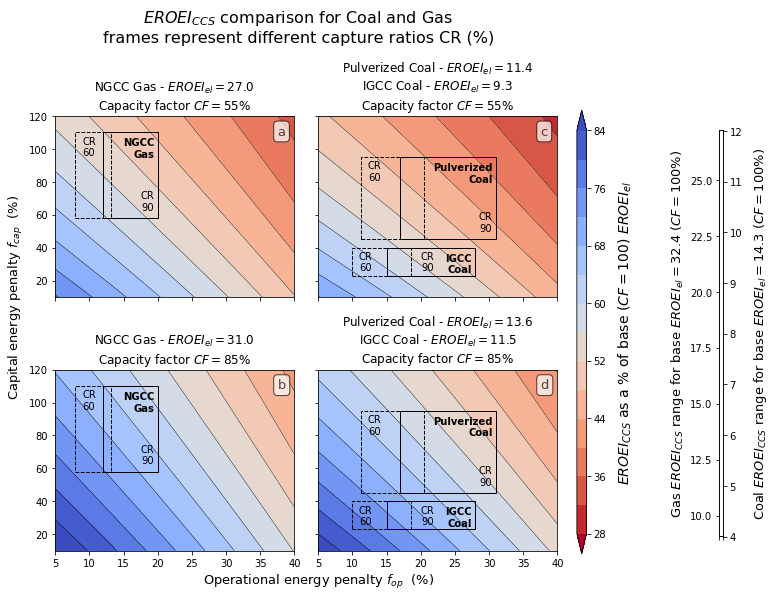

In [93]:
fop=np.linspace(5,40,100)
fcap=np.linspace(10,120,100)
CF=[55,85]
R=[[1.7,2.5],[1.2,1.8],[0.9,1.5]] #varies by name and CF
title=u'$EROEI_{CCS}$ comparison for Coal and Gas'
#eroei_els=[30,13,13] #varies by name
eroei_els=[32.4,14.3,12.25] #100% CF value from the CF converstion table
names=['NGCC\nGas','Pulverized\nCoal','IGCC\nCoal'] 
t0s=[[12,20,58,110],[17,31,45,95],[15,28,23,40]]  # [fop range [min,max], fcap] by each name

eroei_el_cf, eroei_ccs, eroei_ccs_min, eroei_ccs_max=eroei_ccs_cycler(names, eroei_els, t0s, CF, R, CR_ratio, fop, fcap)

fig,axes=plt.subplots(2,2,figsize=(9,8))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.1)
eroei_ccs_scale_min=28
eroei_ccs_scale_max=84

for i in range(len(axes)):
    for j in range(len(axes[i])):
        eroei_el=eroei_els[j]
        ax=axes[i][j]
        X, Y = np.meshgrid(fop, fcap)
        z = eroei_ccs[j][i][0]*100.0/eroei_el #third index is CR, keep at 0, its relative
        levels = MaxNLocator(nbins=15).tick_values(eroei_ccs_scale_min,eroei_ccs_scale_max)
        levels2 = MaxNLocator(nbins=5).tick_values(eroei_ccs_scale_min,eroei_ccs_scale_max)
        cmap = plt.get_cmap('coolwarm_r')
        im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
        im2 = ax.contour(X, Y, z, levels=levels,extend='both',colors='k',linewidths=0.4)
        im3 = ax.contour(X, Y, z, levels=levels2,extend='both',colors='k',linewidths=0.01)
        if (i==0)and(j==1):
            fig.subplots_adjust(right=0.9)
            cbar_ax = fig.add_axes([0.93, 0.12, 0.015, 0.77])
            fig.colorbar(im, cax=cbar_ax)
            cbar_ax.set_ylabel(u'$EROEI_{CCS}$ as a % of base ($CF=100%$) $EROEI_{el}$',fontsize=14,labelpad=10)

            fig.subplots_adjust(right=0.9)
            aux_ax = fig.add_axes([1.15, 0.15, 0.005, 0.705])
            aux_ax.set_ylabel('Gas $EROEI_{CCS}$ range for base $EROEI_{el}='+\
                              str(eroei_els[0])+'$ ($CF=100$%)',fontsize=13)
            aux_ax.set_ylim(eroei_els[0]*eroei_ccs_scale_min/100.0,
                            eroei_els[0]*eroei_ccs_scale_max/100.0)
            aux_ax2=aux_ax.twinx()
            aux_ax2.set_ylabel('Coal $EROEI_{CCS}$ range for base $EROEI_{el}='+\
                               str(eroei_els[1])+'$ ($CF=100$%)',fontsize=13,labelpad=10)
            aux_ax2.set_ylim(eroei_els[1]*eroei_ccs_scale_min/100.0,
                             eroei_els[1]*eroei_ccs_scale_max/100.0)
            aux_ax.set_xticklabels('')   

        ax.set_xlim((fop.min(),fop.max()))
        ax.set_ylim((fcap.min(),fcap.max()))

        ls=['-','--']
        ls0='-'
        lw0=0.5
        t_x_offset=[6.5,12.5,6]
        t_y_offset=[47,45,14]
        breaker=['\n','\n','\n']
        for m in range(len(CR_ratio)):
            n=0
            for ti in range(len(t0s)):
                if (((j==1)and(ti==2))or(ti==j)):
                    t0=t0s[ti]
                    t=[t0[0]*CR_ratio[m],t0[1]*CR_ratio[m],t0[2]+n,t0[3]+n]
                    rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],ls=ls[m],
                                             edgecolor='k',facecolor='none')
                    ax.add_patch(rect)

                    if m==1:
                        ax.text(t[0]+2,t[3]-14,'CR\n'+str(CR[m]),horizontalalignment='center')
                    else:
                        ax.text(t[0]+t_x_offset[ti],t[3]-t_y_offset[ti],'CR'+breaker[ti]+str(CR[m]),
                                horizontalalignment='center')
                    if m==0: 
                        ax.text(t[1]-0.5,t[3]-15,names[ti],horizontalalignment='right',weight='bold')
                    if (ti==1)and(m==1):
                        line = lines.Line2D((t0[0],t[1]),((t0[2]+t0[3])/2,(t[2]+t[3])/2),color='k',
                                            linewidth=lw0,ls=ls0)
                        #ax.add_line(line)  

        if j==0:
            ax.set_title(names[0].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[0][i],1))+\
                         u'$\nCapacity factor $CF='+str(CF[i])+'$%')
        else:
            ax.set_title(names[1].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[1][i],1))+'$\n'+\
                         names[2].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[2][i],1))+\
                         u'$\nCapacity factor $CF='+str(CF[i])+'$%')
        ax.text(0.93, 0.95, string.ascii_lowercase[j*len(axes)+i],
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes,size=13,alpha=0.7,
                          bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            
axes[1][1].set_xlabel('Operational energy penalty $f_{op}$  (%)',fontsize=13,x=0)
axes[0][0].set_ylabel('Capital energy penalty $f_{cap}$  (%)',fontsize=13,y=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
plt.suptitle(title+'\nframes represent different capture ratios CR (%)',fontsize=16,y=1.07)
plt.savefig('plot/fig2.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Different style plot with actual EROEI values on the color maps, and also display _min_ and _max_ values for the $EROEI_{CCS}$.

Calculating NGCC Gas...
CF=55, CR=90, EROEI_el_CF_100%=32.4, EROEI_el_CF_55%=27.01, EROEI_CCS - min=15.27, max=19.71
CF=55, CR=60, EROEI_el_CF_100%=32.4, EROEI_el_CF_55%=27.01, EROEI_CCS - min=16.58, max=20.59
CF=85, CR=90, EROEI_el_CF_100%=32.4, EROEI_el_CF_85%=31.01, EROEI_CCS - min=18.78, max=23.56
CF=85, CR=60, EROEI_el_CF_100%=32.4, EROEI_el_CF_85%=31.01, EROEI_CCS - min=20.39, max=24.62
Calculating Pulverized Coal...
CF=55, CR=90, EROEI_el_CF_100%=14.3, EROEI_el_CF_55%=11.35, EROEI_CCS - min=5.45, max=7.87
CF=55, CR=60, EROEI_el_CF_100%=14.3, EROEI_el_CF_55%=11.35, EROEI_CCS - min=6.29, max=8.41
CF=85, CR=90, EROEI_el_CF_100%=14.3, EROEI_el_CF_85%=13.55, EROEI_CCS - min=6.96, max=9.75
CF=85, CR=60, EROEI_el_CF_100%=14.3, EROEI_el_CF_85%=13.55, EROEI_CCS - min=8.02, max=10.41
Calculating IGCC Coal...
CF=55, CR=90, EROEI_el_CF_100%=12.25, EROEI_el_CF_55%=9.33, EROEI_CCS - min=5.5, max=7.14
CF=55, CR=60, EROEI_el_CF_100%=12.25, EROEI_el_CF_55%=9.33, EROEI_CCS - min=6.23, max=7.55
CF

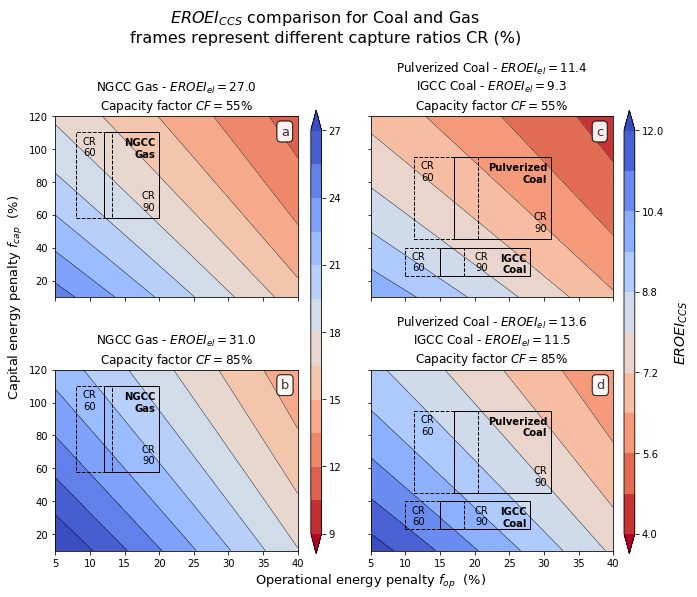

In [97]:
eroei_el_cf, eroei_ccs, eroei_ccs_min, eroei_ccs_max=eroei_ccs_cycler(names, eroei_els, t0s, CF, R, CR_ratio, fop, fcap, verbose=True)

fig,axes=plt.subplots(2,2,figsize=(10,8))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.3)

eroei_ccs_scale_min2=1.2
eroei_ccs_scale_max2=3.2

for i in range(len(axes)):
    for j in range(len(axes[i])):
        eroei_el=eroei_els[j]
        ax=axes[i][j]
        X, Y = np.meshgrid(fop, fcap)
        z = eroei_ccs[j][i][0]#*100.0/eroei_el #third index is CR, keep at 0, its relative
        levels = MaxNLocator(nbins=12).tick_values(eroei_el/eroei_ccs_scale_max2, eroei_el/eroei_ccs_scale_min2)
        levels2 = MaxNLocator(nbins=8).tick_values(eroei_el/eroei_ccs_scale_max2, eroei_el/eroei_ccs_scale_min2)
        cmap = plt.get_cmap('coolwarm_r')
        im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
        im2 = ax.contour(X, Y, z, levels=levels,extend='both',colors='k',linewidths=0.4)
        im3 = ax.contour(X, Y, z, levels=levels2,extend='both',colors='k',linewidths=0.01)
        ax.set_xlim((fop.min(),fop.max()))
        ax.set_ylim((fcap.min(),fcap.max()))
        if (i==0):
            fig.subplots_adjust(right=0.9)
            cbar_ax = fig.add_axes([0.48+0.435*j, 0.12, 0.015, 0.77])
            fig.colorbar(im, cax=cbar_ax)
            if j==1: cbar_ax.set_ylabel(u'$EROEI_{CCS}$',fontsize=14,labelpad=10)

        for m in range(len(CR_ratio)):
            n=0
            for ti in range(len(t0s)):
                if (((j==1)and(ti==2))or(ti==j)):
                    t0=t0s[ti]
                    t=[t0[0]*CR_ratio[m],t0[1]*CR_ratio[m],t0[2]+n,t0[3]+n]
                    rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],ls=ls[m],
                                             edgecolor='k',facecolor='none')
                    ax.add_patch(rect)

                    if m==1:
                        ax.text(t[0]+2,t[3]-14,'CR\n'+str(CR[m]),horizontalalignment='center')
                    else:
                        ax.text(t[0]+t_x_offset[ti],t[3]-t_y_offset[ti],'CR'+breaker[ti]+str(CR[m]),
                                horizontalalignment='center')
                    if m==0: 
                        ax.text(t[1]-0.5,t[3]-15,names[ti],horizontalalignment='right',weight='bold')
                    if (ti==1)and(m==1):
                        line = lines.Line2D((t0[0],t[1]),((t0[2]+t0[3])/2,(t[2]+t[3])/2),color='k',
                                            linewidth=lw0,ls=ls0)
                        #ax.add_line(line)  

        if j==0:
            ax.set_title(names[0].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[0][i],1))+\
                         u'$\nCapacity factor $CF='+str(CF[i])+'$%')
        else:
            ax.set_title(names[1].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[1][i],1))+'$\n'+\
                         names[2].replace('\n',' ')+' - $EROEI_{el}='+\
                     str(round(eroei_el_cf[2][i],1))+\
                         u'$\nCapacity factor $CF='+str(CF[i])+'$%')
        ax.text(0.93, 0.95, string.ascii_lowercase[j*len(axes)+i],
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes,size=13,alpha=0.7,
                          bbox=dict(boxstyle="round", fc="w", alpha=0.7))
        ax.text(0.93, 0.95, string.ascii_lowercase[j*len(axes)+i],
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes,size=13,alpha=0.7,
                          bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            
axes[1][1].set_xlabel('Operational energy penalty $f_{op}$  (%)',fontsize=13,x=0)
axes[0][0].set_ylabel('Capital energy penalty $f_{cap}$  (%)',fontsize=13,y=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
plt.suptitle(title+'\nframes represent different capture ratios CR (%)',fontsize=16,y=1.07)
plt.savefig('plot/fig2b.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

### Dispatchable Renewables Part

#### Equations

In [98]:
l=Symbol('lambda')
epse=Symbol('epsilon')
var('ESOI D');
eq_S7=Eq(ESOI,l*e*D/epse)
eq_S7

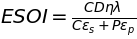

In [99]:
epsp=Symbol('epsilon_p')
epss=Symbol('epsilon_s')
var('D P C');
eq_S8=Eq(ESOI,C*l*e*D/(P*epsp+C*epss))
eq_S8

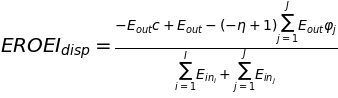

In [100]:
f=Symbol('varphi_j')
Ei=Symbol('E_{in_i}')
Ej=Symbol('E_{in_j}')
var('EROEI_disp c j i I J');
eq_S9=Eq(EROEI_disp,(E_out-(1-e)*Sum(f*E_out,(j,1,J))-c*E_out)/(Sum(Ei,(i,1,I))+Sum(Ej,(j,1,J))))
eq_S9

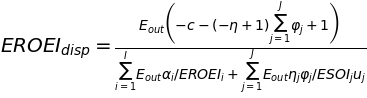

In [101]:
a=Symbol('alpha_i')
ej=Symbol('eta_j')
f=Symbol('varphi_j')
Ei=Symbol('E_{in_i}')
Ej=Symbol('E_{in_j}')
var('EROEI_i u_j ESOI_j');
eq_S10=Eq(EROEI_disp,(E_out*(1-(1-e)*Sum(f,(j,1,J))-c))/(Sum(E_out*a/EROEI_i,(i,1,I))+Sum((E_out*f*ej)/(ESOI_j*u_j),(j,1,J))))
eq_S10

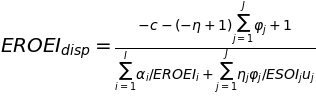

In [102]:
eq_S11=Eq(EROEI_disp,((1-(1-e)*Sum(f,(j,1,J))-c))/(Sum(a/EROEI_i,(i,1,I))+Sum((f*ej)/(ESOI_j*u_j),(j,1,J))))
eq_S11

#### Simulation

Define $EROEI_{disp}$ calcuator function `eroei_disp_cycler`, including minimums and maximums over $\varphi$.

In [103]:
def eroei_disp_cycler(ESOI, phi, eta, c, eroei_el):
    #eroei_disp=np.zeros([len(ESOI),len(phi),len(eroei_el)])
    eroei_disp=np.zeros([len(ESOI),len(eroei_el),len(phi)])
    for i in range(len(ESOI)):
        for j in range(len(phi)):
            for k in range(len(eroei_el)):
                #eq_S11
                #Also Eq. 6 from http://pubs.rsc.org/en/content/articlepdf/2013/ee/c3ee41973h
                eroei_disp[i][k,j]=(-c[i]-(+1-eta[i])*phi[j]+1)/\
                                    ((1.0/eroei_el[k])+(eta[i]*phi[j]/ESOI[i]))    
    return eroei_disp

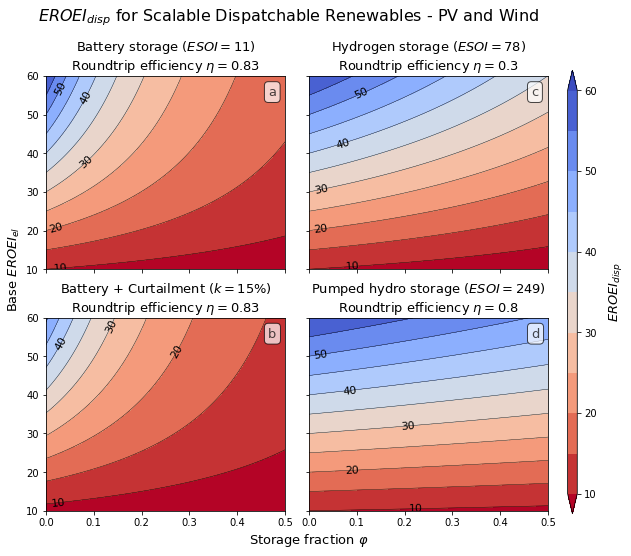

In [104]:
eroei_el=np.linspace(10,60,100)
phi=np.linspace(.0,.50,100)
ESOI=[11,78,11,249]
ESOI_tech=['Battery storage','Hydrogen storage','Battery + Curtailment','Pumped hydro storage']
eta=[0.83,0.3,0.83,0.8]
c=[0,0,0.15,0]

eroei_disp=eroei_disp_cycler(ESOI, phi, eta, c, eroei_el)

fig,axes=plt.subplots(2,2,figsize=(9,8))
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.25)
contour_min=10
contour_max=60
for i in range(len(ESOI)):
        ax=axes[i/2][i%2]
        z = eroei_disp[i]
        levels = MaxNLocator(nbins=10).tick_values(contour_min, contour_max)
        levels2 = MaxNLocator(nbins=5).tick_values(contour_min, contour_max)
        cmap = plt.get_cmap('coolwarm_r')
        X, Y = np.meshgrid(phi, eroei_el)
        im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
        im2 = ax.contour(X, Y, z, levels=levels,extend='both',colors='k',linewidths=0.4)
        im3 = ax.contour(X, Y, z, levels=levels2,extend='both',colors='k',linewidths=0.01)    
        ax.clabel(im3, fmt = '%i',inline=1, fontsize=11)
        if (i==0):
            fig.subplots_adjust(right=0.9)
            cbar_ax = fig.add_axes([0.93, 0.12, 0.015, 0.77])
            fig.colorbar(im, cax=cbar_ax)
            cbar_ax.set_ylabel(u'$EROEI_{disp}$',fontsize=13,labelpad=10)
        ax.set_xlim((phi.min(),phi.max()))
        ax.set_ylim((eroei_el.min(),eroei_el.max()))
        if (i!=2):
            ax.set_title(ESOI_tech[i]+u' ($ESOI='+str(ESOI[i])+\
                     '$)\nRoundtrip efficiency $\eta='+str(eta[i])+'$',fontsize=13)
        else:
            ax.set_title(ESOI_tech[i]+u' ($k='+str(int(c[i]*100))+\
                     '$%)\nRoundtrip efficiency $\eta='+str(eta[i])+'$',fontsize=13)
        ax.text(0.93, 0.95, string.ascii_lowercase[(i%2)*2+i/2],
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes,size=13,alpha=0.7,
                              bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            
axes[1][1].set_xlabel('Storage fraction $\\varphi$',fontsize=13,x=0)
axes[0][0].set_ylabel('Base $EROEI_{el}$',fontsize=13,y=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
plt.suptitle(r'$EROEI_{disp}$ for Scalable Dispatchable Renewables - PV and Wind',fontsize=16,y=1)
plt.savefig('plot/fig3.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Define convex hull function to get outermost points of sensitivity analysis area.

In [105]:
from scipy.spatial import ConvexHull

In [106]:
def convexhull(p):
    p = np.array(p)
    hull = ConvexHull(p)
    return p[hull.vertices,:]

Define wieldy color functions.

In [107]:
def cbrew(i):
    colors=['#984ea3',
            '#e41a1c',
            '#377eb8',
            '#018571',
            '#e66101']
    return colors[i]
def cbrew2(i):
    colors=['#984ea3',
            '#e41a1c',
            '#377eb8',
            '#4daf4a',
            '#ff7f00']
    return colors[i]

Define figure aspect ratio getter for labels.

In [108]:
from operator import sub
#https://stackoverflow.com/questions/41597177/get-aspect-ratio-of-axes#42014041
def get_aspect(ax):
    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()
    # Axis size on figure
    _, _, w, h = ax.get_position().bounds
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    # Ratio of data units
    # Negative over negative because of the order of subtraction
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

    return disp_ratio / data_ratio

Caclulate envelopes

In [ ]:
#Fossil part
segments=400
eroei_el_ns=[np.linspace(10,32,segments),np.linspace(5,13,segments),np.linspace(8,16,segments)]   
CF100=[100] #since we are using EROEI_els directly in the sensitivity plots, we need no CF adjustment
eroei_ccs_N, eroei_ccs_min_N, eroei_ccs_max_N=[],[],[]
for i in range(len(names)):
    print 'calculating '+names[i].replace('\n',' ')+' area...'
    eroei_ccs_n, eroei_ccs_min_n, eroei_ccs_max_n=[],[],[]
    for eroi in range(len(eroei_el_ns[i])):
        eroei_el_cf, eroei_ccs, eroei_ccs_min, eroei_ccs_max=\
                eroei_ccs_cycler([names[i]], [eroei_el_ns[i][eroi]], [t0s[i]], CF100, [R[i]], CR_ratio, fop, fcap)
        eroei_ccs_n.append(eroei_ccs)
        eroei_ccs_min_n.append(eroei_ccs_min)
        eroei_ccs_max_n.append(eroei_ccs_max)
    eroei_ccs_N.append(eroei_ccs_n)
    eroei_ccs_min_N.append(eroei_ccs_min_n)
    eroei_ccs_max_N.append(eroei_ccs_max_n)
fs_top=max(np.array(eroei_ccs_max_N).flatten())

calculating NGCC Gas area...
calculating Pulverized Coal area...
calculating IGCC Coal area...


In [ ]:
#RE part
eroei_el_ren=[np.linspace(9,30,segments),np.linspace(20,40,segments)]
eroei_el_pv=[[9,17],[12,23],[20,40]] #current medium and high PV EROEI_el ranges, future 2022 range
eroei_el_eu=[[18,35],[0.33,0.67],23.7] #Table S3, current EU solar PV and wind EROEI_el, shares and resulting EROEI_disp
eroei_ren_names=['PV','Wind']
eroei_disp_n=[]
re_bottom=[1000 for i in range(len(ESOI))]
for i in range(len(eroei_ren_names)):
    print 'calculating '+eroei_ren_names[i]+' area...'
    eroei_disp=eroei_disp_cycler(ESOI, phi, eta, c, eroei_el_ren[i])
    eroei_disp_n.append(eroei_disp)  
    for j in range(len(eroei_disp_n[i])):
        re_bottom[j]=min(re_bottom[j],min(np.array(eroei_disp_n[i][j]).flatten()))

Plot areas

In [ ]:
#Plots init
fig,axes=plt.subplots(2,2,figsize=(9,8),subplot_kw=dict(facecolor='#EEEEEE',axisbelow=True))
for axi in axes:
    for ax in axi:
        ax.grid(color='white', linestyle='solid')                       
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.3)
legendalpha=0.5
labelfontsize=9

#Fossil part
for i in range(len(names)):
    points=[]
    print 'calculating '+names[i].replace('\n',' ')+' convex hull...'
    for eroi in range(len(eroei_el_ns[i])):
        x0=eroei_el_ns[i][eroi]
        y0min=min(eroei_ccs_min_N[i][eroi].flatten())
        y0max=max(eroei_ccs_max_N[i][eroi].flatten())
        points.append([x0,y0min])
        points.append([x0,y0max])
                              
    for axi in axes:
        for ax in axi:
            colr=cbrew(i)
            poly = plt.Polygon(convexhull(points), edgecolor="k",facecolor=colr,alpha=0.4)
            poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
            legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=names[i].replace('\n',' '))
            ax.add_patch(poly)
            ax.add_patch(poly2)
            ax.add_patch(legendpoly)

#RE part
for i in range(len(eroei_disp_n))[::-1]:
    print 'calculating '+eroei_ren_names[i]+' convex hull...'
    for j in range(len(eroei_disp_n[i])):
        points=[]
        for eroi in range(len(eroei_disp_n[i][j])):
            x0=eroei_el_ren[i][eroi]
            y0min=min(eroei_disp_n[i][j][eroi].flatten())
            y0max=max(eroei_disp_n[i][j][eroi].flatten())
            points.append([x0,y0min])
            points.append([x0,y0max])

        colr=cbrew(4-i)
        ax=axes[j/2][j%2]
        poly = plt.Polygon(convexhull(points), edgecolor="none",facecolor=colr,alpha=0.4)
        poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
        legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=eroei_ren_names[i])
        ax.add_patch(poly)
        ax.add_patch(poly2)
        ax.add_patch(legendpoly)
        if (i==0):
            if (j!=2):
                ax.set_title(ESOI_tech[j]+u' ($ESOI='+str(ESOI[j])+\
                     '$)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            else:
                ax.set_title(ESOI_tech[j]+u' ($k='+str(int(c[j]*100))+\
                     '$%)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            ax.text(0.93, 0.12, string.ascii_lowercase[(j%2)*2+j/2],
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax.transAxes,size=13,alpha=0.7,
                    bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            ax.plot([0,100],[0,100],c='grey',lw=1,ls='--')
            if (j==2): 
                ax.text(0.22, 0.27, 'no storage',
                        horizontalalignment='center',
                        verticalalignment='center',
                        transform=ax.transAxes,size=11,rotation=40, color='grey')
                ax.arrow(35, 35, 0, -4, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.arrow(35, 29.3, 0, -9.5, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.text(34.5, 32, 'curtailment',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
                ax.text(34.5, 22, 'more\nstorage',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
            if (j==1):
                arrowoffset=[2,1,2]
                arrowtext=['PV moderate       ','   PV high','PV in 2022']
                for a in range(len(eroei_el_pv)):
                    x1,y1=eroei_el_pv[a][0], eroei_el_pv[a][0]-arrowoffset[a]
                    w1,h1=eroei_el_pv[a][1]-eroei_el_pv[a][0],eroei_el_pv[a][1]-eroei_el_pv[a][0]
                    ax.arrow(x1,y1,w1,h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.arrow(x1+w1,y1+h1,-w1,-h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.text(x1+w1/1.5-arrowoffset[a], y1+h1/1.5+2, arrowtext[a],
                        horizontalalignment='center',
                        verticalalignment='center', rotation=40, color='k')
                
                x2=eroei_el_eu[0][0]*eroei_el_eu[1][0]+eroei_el_eu[0][1]*eroei_el_eu[1][1]
                y2=eroei_el_eu[2]
                ax.scatter([x2],[y2],color='k',zorder=100)
                ax.text(x2*1.04, y2*1.03, 'European\nsystem\nexample',
                        horizontalalignment='left',
                        verticalalignment='center', rotation=0, color='k')
            
#Format labels
for axi in axes:
    for ax in axi:
        ax.set_xlim(0,max(np.array(eroei_el_ren).flatten()))
        ax.set_ylim(0,max(np.array(eroei_el_ren).flatten()))
axes[0][0].set_ylabel('$EROEI_{CCS}$ | $EROEI_{disp}$',fontsize=14,y=0)
axes[1][1].set_xlabel('Base $EROEI_{el}$',fontsize=14,x=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
#axes[0][1].legend(loc=(1.04,0.58),fontsize=11)       
axes[0][0].legend(loc=(0.03,0.52),framealpha=0,fontsize=11)       
        
plt.suptitle('Comparison of adjusted EROEIs for \nfossil fuels with carbon-capture and storage $EROEI_{CCS}$ and \ndispatchable renewables with energy storage $EROEI_{disp}$',y=1.06,fontsize=15)
plt.savefig('plot/fig4.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Annotated comparable area plots

calculating NGCC Gas convex hull...
calculating Pulverized Coal convex hull...
calculating IGCC Coal convex hull...
calculating Wind convex hull...
calculating PV convex hull...


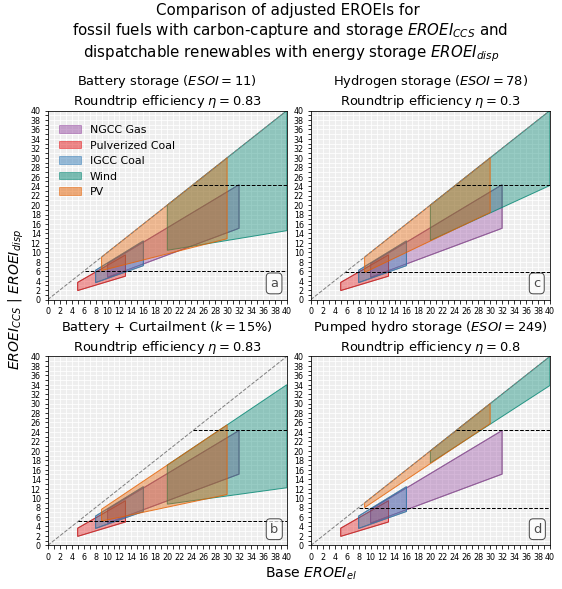

In [114]:
#Plots init
fig,axes=plt.subplots(2,2,figsize=(9,8),subplot_kw=dict(facecolor='#EEEEEE',axisbelow=True))
for axi in axes:
    for ax in axi:
        ax.grid(color='white', linestyle='solid')                       
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.3)

#Fossil part
for i in range(len(names)):
    points=[]
    print 'calculating '+names[i].replace('\n',' ')+' convex hull...'
    for eroi in range(len(eroei_el_ns[i])):
        x0=eroei_el_ns[i][eroi]
        y0min=min(eroei_ccs_min_N[i][eroi].flatten())
        y0max=max(eroei_ccs_max_N[i][eroi].flatten())
        points.append([x0,y0min])
        points.append([x0,y0max])
                              
    for axi in axes:
        for ax in axi:
            colr=cbrew(i)
            poly = plt.Polygon(convexhull(points), edgecolor="k",facecolor=colr,alpha=0.4)
            poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
            legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=names[i].replace('\n',' '))
            ax.add_patch(poly)
            ax.add_patch(poly2)
            ax.add_patch(legendpoly)

#RE part
for i in range(len(eroei_disp_n))[::-1]:
    print 'calculating '+eroei_ren_names[i]+' convex hull...'
    for j in range(len(eroei_disp_n[i])):
        points=[]
        for eroi in range(len(eroei_disp_n[i][j])):
            x0=eroei_el_ren[i][eroi]
            y0min=min(eroei_disp_n[i][j][eroi].flatten())
            y0max=max(eroei_disp_n[i][j][eroi].flatten())
            points.append([x0,y0min])
            points.append([x0,y0max])

        colr=cbrew(4-i)
        ax=axes[j/2][j%2]
        poly = plt.Polygon(convexhull(points), edgecolor="none",facecolor=colr,alpha=0.4)
        poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
        legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=eroei_ren_names[i])
        ax.add_patch(poly)
        ax.add_patch(poly2)
        ax.add_patch(legendpoly)
        if (i==0):
            if (j!=2):
                ax.set_title(ESOI_tech[j]+u' ($ESOI='+str(ESOI[j])+\
                     '$)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            else:
                ax.set_title(ESOI_tech[j]+u' ($k='+str(int(c[j]*100))+\
                     '$%)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            ax.text(0.93, 0.12, string.ascii_lowercase[(j%2)*2+j/2],
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax.transAxes,size=13,alpha=0.7,
                    bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            ax.plot([0,100],[0,100],c='grey',lw=1,ls='--')
            ax.plot([re_bottom[j],100],[re_bottom[j],re_bottom[j]],c='k',lw=1,ls='--')
            ax.plot([fs_top,100],[fs_top,fs_top],c='k',lw=1,ls='--')
            
#Format labels
axes[0][0].set_ylabel('$EROEI_{CCS}$ | $EROEI_{disp}$',fontsize=14,y=0)
axes[1][1].set_xlabel('Base $EROEI_{el}$',fontsize=14,x=0)        
maxlabel=max(np.array(eroei_el_ren).flatten())
labelrange=[i if i%2==0 else '' for i in range(int(maxlabel)+1) ]
for axi in axes:
    for ax in axi:
        ax.set_xlim(0,maxlabel)
        ax.set_ylim(0,maxlabel)
        ax.set_xticks(range(int(maxlabel)+1))
        ax.set_yticks(range(int(maxlabel)+1))
        ax.set_yticks(range(int(maxlabel)+1))
        ax.set_xticklabels(labelrange,fontsize=8)   
        ax.set_yticklabels(labelrange,fontsize=8) 

#axes[0][1].legend(loc=(1.04,0.58),fontsize=11)       
axes[0][0].legend(loc=(0.03,0.52),framealpha=0,fontsize=11)       
        
plt.suptitle('Comparison of adjusted EROEIs for \nfossil fuels with carbon-capture and storage $EROEI_{CCS}$ and \ndispatchable renewables with energy storage $EROEI_{disp}$',y=1.06,fontsize=15)
plt.savefig('plot/fig4_annotated.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Shaded area plots

In [115]:
def alpharater(g,n,t):
    if g<t*n:
        return (g+1)*1.0/(t*n)
    elif g+1>(1-t)*n:
        return ((n-g))*1.0/(t*n)
    else:
        return 1

calculating NGCC Gas convex hull...
calculating Pulverized Coal convex hull...
calculating IGCC Coal convex hull...
calculating Wind convex hull...
calculating PV convex hull...


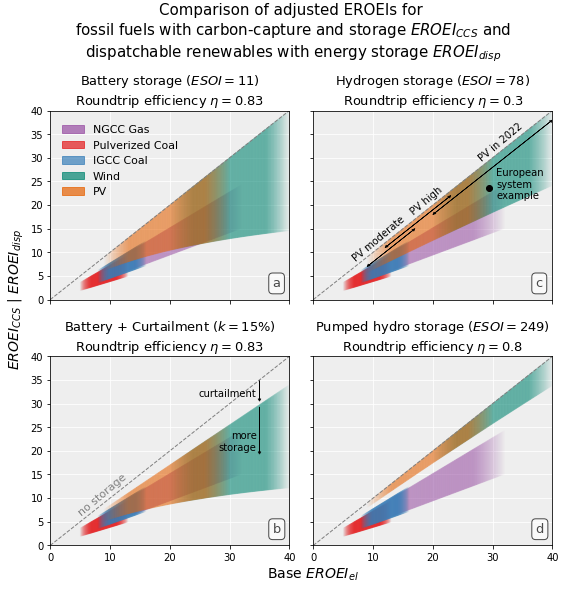

In [116]:
legendalpha=0.7

#Plots init
fig,axes=plt.subplots(2,2,figsize=(9,8),subplot_kw=dict(facecolor='#EEEEEE',axisbelow=True))
for axi in axes:
    for ax in axi:
        ax.grid(color='white', linestyle='solid')                       
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.3)

#Fossil part
for i in range(len(names)):
    points=[]
    print 'calculating '+names[i].replace('\n',' ')+' convex hull...'
    for eroi in range(len(eroei_el_ns[i])):
        x0=eroei_el_ns[i][eroi]
        y0min=min(eroei_ccs_min_N[i][eroi].flatten())
        y0max=max(eroei_ccs_max_N[i][eroi].flatten())
        points.append([x0,y0min])
        points.append([x0,y0max])
                              
    for axi in axes:
        for ax in axi:
            colr=cbrew(i)
            nfaces=200
            tfaces=0.24
            basealpha=0.3
            for g,p in enumerate(np.split(np.array(points),nfaces)):
                poly = plt.Polygon(convexhull(p), edgecolor=colr,
                                   alpha=basealpha*alpharater(g,nfaces,tfaces),fill=False,lw=1)
                ax.add_patch(poly)
            poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
            #ax.add_patch(poly2)
            legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=names[i].replace('\n',' '))
            ax.add_patch(legendpoly)

#RE part
for i in range(len(eroei_disp_n))[::-1]:
    print 'calculating '+eroei_ren_names[i]+' convex hull...'
    for j in range(len(eroei_disp_n[i])):
        points=[]
        for eroi in range(len(eroei_disp_n[i][j])):
            x0=eroei_el_ren[i][eroi]
            y0min=min(eroei_disp_n[i][j][eroi].flatten())
            y0max=max(eroei_disp_n[i][j][eroi].flatten())
            points.append([x0,y0min])
            points.append([x0,y0max])

        colr=cbrew(4-i)
        ax=axes[j/2][j%2]
        nfaces=200
        tfaces=0.2
        basealpha=0.3
        for g,p in enumerate(np.split(np.array(points),nfaces)):
            poly = plt.Polygon(convexhull(p), edgecolor=colr,
                               alpha=basealpha*alpharater(g,nfaces,tfaces),fill=False,lw=0.95)
            ax.add_patch(poly)
        poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.8,fill=False,lw=1)
        #ax.add_patch(poly2)
        legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=eroei_ren_names[i])
        ax.add_patch(legendpoly)
        if (i==0):
            if (j!=2):
                ax.set_title(ESOI_tech[j]+u' ($ESOI='+str(ESOI[j])+\
                     '$)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            else:
                ax.set_title(ESOI_tech[j]+u' ($k='+str(int(c[j]*100))+\
                     '$%)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            ax.text(0.93, 0.12, string.ascii_lowercase[(j%2)*2+j/2],
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax.transAxes,size=13,alpha=0.7,
                    bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            ax.plot([0,100],[0,100],c='grey',lw=1,ls='--')
            if (j==2): 
                ax.text(0.22, 0.27, 'no storage',
                        horizontalalignment='center',
                        verticalalignment='center',
                        transform=ax.transAxes,size=11,rotation=40, color='grey')
                ax.arrow(35, 35, 0, -4, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.arrow(35, 29.3, 0, -9.5, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.text(34.5, 32, 'curtailment',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
                ax.text(34.5, 22, 'more\nstorage',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
            if (j==1):
                arrowoffset=[2,1,2]
                arrowtext=['PV moderate       ','   PV high','PV in 2022']
                for a in range(len(eroei_el_pv)):
                    x1,y1=eroei_el_pv[a][0], eroei_el_pv[a][0]-arrowoffset[a]
                    w1,h1=eroei_el_pv[a][1]-eroei_el_pv[a][0],eroei_el_pv[a][1]-eroei_el_pv[a][0]
                    ax.arrow(x1,y1,w1,h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.arrow(x1+w1,y1+h1,-w1,-h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.text(x1+w1/1.5-arrowoffset[a], y1+h1/1.5+2, arrowtext[a],
                        horizontalalignment='center',
                        verticalalignment='center', rotation=40, color='k')
                
                x2=eroei_el_eu[0][0]*eroei_el_eu[1][0]+eroei_el_eu[0][1]*eroei_el_eu[1][1]
                y2=eroei_el_eu[2]
                ax.scatter([x2],[y2],color='k',zorder=100)
                ax.text(x2*1.04, y2*1.03, 'European\nsystem\nexample',
                        horizontalalignment='left',
                        verticalalignment='center', rotation=0, color='k')
            
#Format labels
for axi in axes:
    for ax in axi:
        ax.set_xlim(0,max(np.array(eroei_el_ren).flatten()))
        ax.set_ylim(0,max(np.array(eroei_el_ren).flatten()))
axes[0][0].set_ylabel('$EROEI_{CCS}$ | $EROEI_{disp}$',fontsize=14,y=0)
axes[1][1].set_xlabel('Base $EROEI_{el}$',fontsize=14,x=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
#axes[0][1].legend(loc=(1.04,0.58),fontsize=11)       
axes[0][0].legend(loc=(0.03,0.52),framealpha=0,fontsize=11)       
        
plt.suptitle('Comparison of adjusted EROEIs for \nfossil fuels with carbon-capture and storage $EROEI_{CCS}$ and \ndispatchable renewables with energy storage $EROEI_{disp}$',y=1.06,fontsize=15)
plt.savefig('plot/fig4_shaded.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

calculating NGCC Gas convex hull...
calculating Pulverized Coal convex hull...
calculating IGCC Coal convex hull...
calculating Wind convex hull...
calculating PV convex hull...


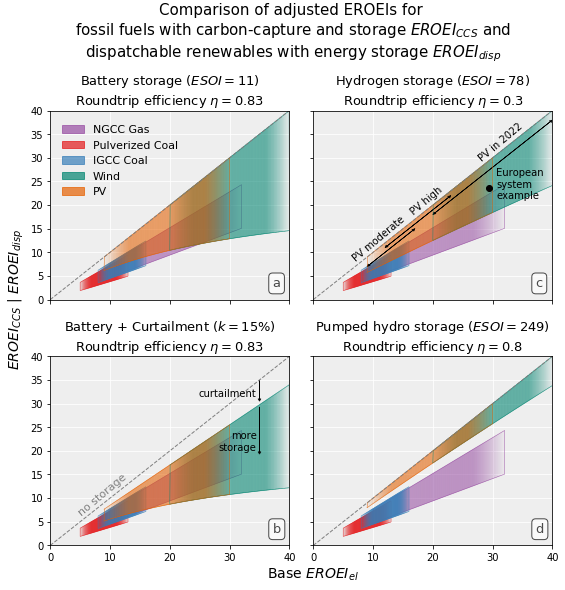

In [117]:
#Plots init
fig,axes=plt.subplots(2,2,figsize=(9,8),subplot_kw=dict(facecolor='#EEEEEE',axisbelow=True))
for axi in axes:
    for ax in axi:
        ax.grid(color='white', linestyle='solid')                       
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.3)

#Fossil part
for i in range(len(names)):
    points=[]
    print 'calculating '+names[i].replace('\n',' ')+' convex hull...'
    for eroi in range(len(eroei_el_ns[i])):
        x0=eroei_el_ns[i][eroi]
        y0min=min(eroei_ccs_min_N[i][eroi].flatten())
        y0max=max(eroei_ccs_max_N[i][eroi].flatten())
        points.append([x0,y0min])
        points.append([x0,y0max])
                              
    for axi in axes:
        for ax in axi:
            colr=cbrew(i)
            nfaces=200
            tfaces=0.24
            basealpha=0.3
            for g,p in enumerate(np.split(np.array(points),nfaces)):
                poly = plt.Polygon(convexhull(p), edgecolor=colr,
                                   alpha=basealpha*alpharater(g,nfaces,tfaces),fill=False,lw=1)
                ax.add_patch(poly)
            poly2 = plt.Polygon(convexhull(points), edgecolor=colr,alpha=0.9,fill=False,lw=0.5)
            ax.add_patch(poly2)
            legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=names[i].replace('\n',' '))
            ax.add_patch(legendpoly)

#RE part
for i in range(len(eroei_disp_n))[::-1]:
    print 'calculating '+eroei_ren_names[i]+' convex hull...'
    for j in range(len(eroei_disp_n[i])):
        points=[]
        for eroi in range(len(eroei_disp_n[i][j])):
            x0=eroei_el_ren[i][eroi]
            y0min=min(eroei_disp_n[i][j][eroi].flatten())
            y0max=max(eroei_disp_n[i][j][eroi].flatten())
            points.append([x0,y0min])
            points.append([x0,y0max])

        colr=cbrew(4-i)
        ax=axes[j/2][j%2]
        nfaces=200
        tfaces=0.2
        basealpha=0.3
        for g,p in enumerate(np.split(np.array(points),nfaces)):
            psegment=convexhull(p)
            poly = plt.Polygon(psegment, edgecolor=colr,
                               alpha=basealpha*alpharater(g,nfaces,tfaces),fill=False,lw=0.95)
            ax.add_patch(poly)
            ax.plot(psegment.T[0][:2],psegment.T[1][:2],c=colr,alpha=0.9,lw=0.5)
            ax.plot(psegment.T[0][2:],psegment.T[1][2:],c=colr,alpha=0.9,lw=0.5)
            if g==0:
                ax.plot(psegment.T[0][0::2],psegment.T[1][0::2],c=colr,alpha=0.9,lw=0.5)
            if g==len(np.split(np.array(points),nfaces))-1:
                ax.plot(psegment.T[0][1::2],psegment.T[1][1::2],c=colr,alpha=0.9,lw=0.5)
                #ax.plot(psegment.T[0][0::2],psegment.T[1][0::2],c=colr,alpha=0.9,lw=0.5)
        legendpoly = plt.Polygon([[0,0],[0,-1],[-1,-1]], edgecolor=colr,facecolor=colr,alpha=legendalpha,lw=1,label=eroei_ren_names[i])
        ax.add_patch(legendpoly)
        if (i==0):
            if (j!=2):
                ax.set_title(ESOI_tech[j]+u' ($ESOI='+str(ESOI[j])+\
                     '$)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            else:
                ax.set_title(ESOI_tech[j]+u' ($k='+str(int(c[j]*100))+\
                     '$%)\nRoundtrip efficiency $\eta='+str(eta[j])+'$',fontsize=13)
            ax.text(0.93, 0.12, string.ascii_lowercase[(j%2)*2+j/2],
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax.transAxes,size=13,alpha=0.7,
                    bbox=dict(boxstyle="round", fc="w", alpha=0.7))
            ax.plot([0,100],[0,100],c='grey',lw=1,ls='--')
            if (j==2): 
                ax.text(0.22, 0.27, 'no storage',
                        horizontalalignment='center',
                        verticalalignment='center',
                        transform=ax.transAxes,size=11,rotation=40, color='grey')
                ax.arrow(35, 35, 0, -4, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.arrow(35, 29.3, 0, -9.5, head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                ax.text(34.5, 32, 'curtailment',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
                ax.text(34.5, 22, 'more\nstorage',
                        horizontalalignment='right',
                        verticalalignment='center', rotation=0, color='k')
            if (j==1):
                arrowoffset=[2,1,2]
                arrowtext=['PV moderate       ','   PV high','PV in 2022']
                for a in range(len(eroei_el_pv)):
                    x1,y1=eroei_el_pv[a][0], eroei_el_pv[a][0]-arrowoffset[a]
                    w1,h1=eroei_el_pv[a][1]-eroei_el_pv[a][0],eroei_el_pv[a][1]-eroei_el_pv[a][0]
                    ax.arrow(x1,y1,w1,h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.arrow(x1+w1,y1+h1,-w1,-h1,length_includes_head=True,
                             head_width=0.5, head_length=0.5, fc='k', ec='k',ls='-',lw=0.5)
                    ax.text(x1+w1/1.5-arrowoffset[a], y1+h1/1.5+2, arrowtext[a],
                        horizontalalignment='center',
                        verticalalignment='center', rotation=40, color='k')
                
                x2=eroei_el_eu[0][0]*eroei_el_eu[1][0]+eroei_el_eu[0][1]*eroei_el_eu[1][1]
                y2=eroei_el_eu[2]
                ax.scatter([x2],[y2],color='k',zorder=100)
                ax.text(x2*1.04, y2*1.03, 'European\nsystem\nexample',
                        horizontalalignment='left',
                        verticalalignment='center', rotation=0, color='k')
            
#Format labels
for axi in axes:
    for ax in axi:
        ax.set_xlim(0,max(np.array(eroei_el_ren).flatten()))
        ax.set_ylim(0,max(np.array(eroei_el_ren).flatten()))
axes[0][0].set_ylabel('$EROEI_{CCS}$ | $EROEI_{disp}$',fontsize=14,y=0)
axes[1][1].set_xlabel('Base $EROEI_{el}$',fontsize=14,x=0)        
axes[0][1].set_yticklabels('')   
axes[1][1].set_yticklabels('')   
axes[0][0].set_xticklabels('')   
axes[0][1].set_xticklabels('')  
#axes[0][1].legend(loc=(1.04,0.58),fontsize=11)       
axes[0][0].legend(loc=(0.03,0.52),framealpha=0,fontsize=11)       
        
plt.suptitle('Comparison of adjusted EROEIs for \nfossil fuels with carbon-capture and storage $EROEI_{CCS}$ and \ndispatchable renewables with energy storage $EROEI_{disp}$',y=1.06,fontsize=15)
plt.savefig('plot/fig4_shaded_edged.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

### Auxiliary plots

In [118]:
df=pd.read_excel('cfdata.xlsx')

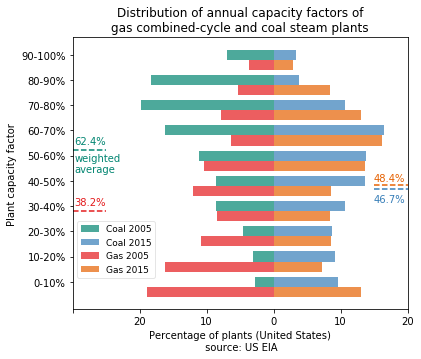

In [312]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.barh(df.index,-df['PC 2005']/sum(df['PC 2005'])*100,0.4,color=cbrew(3),label='Coal 2005',alpha=legendalpha)
ax.barh(df.index,df['PC 2015']/sum(df['PC 2015'])*100,0.4,color=cbrew(2),label='Coal 2015',alpha=legendalpha)
ax.barh(df.index-0.4,-df['NG 2005']/sum(df['NG 2005'])*100,0.4,color=cbrew(1),label='Gas 2005',alpha=legendalpha)
ax.barh(df.index-0.4,df['NG 2015']/sum(df['NG 2015'])*100,0.4,color=cbrew(4),label='Gas 2015',alpha=legendalpha)
z=np.average(df.index+0.5,weights=df['NG 2005'])-1
ax.plot([-30,-25],[z,z],ls='--',color=cbrew(1))
ax.text(-29.7,z+0.2,str(np.round((z+1)*10,1))+ '%',color=cbrew(1))
z=np.average(df.index+0.5,weights=df['NG 2015'])-1
ax.plot([15,20],[z,z],ls='--',color=cbrew(4))
ax.text(15,z+0.15,str(np.round((z+1)*10,1))+ '%',color=cbrew(4))
z=np.average(df.index+0.5,weights=df['PC 2005'])-1
ax.plot([-30,-25],[z,z],ls='--',color=cbrew(3))
ax.text(-29.7,z+0.2,str(np.round((z+1)*10,1))+ '%',color=cbrew(3))
ax.text(-29.7,z-0.9,'weighted\naverage',color=cbrew(3))
z=np.average(df.index+0.5,weights=df['PC 2015'])-1
#z=np.average(df.index+0.5)-1
ax.plot([15,20],[z,z],ls='--',color=cbrew(2))
ax.text(15,z-0.5,str(np.round((z+1)*10,1))+ '%',color=cbrew(2))

fig.canvas.draw()
labels = ['']+[item.get_text().replace(u'\u2212','') for item in ax.get_xticklabels()[2:-1]]+['']
ax.set_xticklabels(labels)
ax.set_yticks(df.index)
ax.set_xlim([-30,20])
ax.set_yticklabels(df['CF'][::-1])
ax.legend(bbox_to_anchor=(0.26, 0.22),framealpha=0.5,fontsize=9)
ax.set_ylabel('Plant capacity factor')
ax.set_xlabel('Percentage of plants (United States)\n source: US EIA')
ax.set_title('Distribution of annual capacity factors of\ngas combined-cycle and coal steam plants')
plt.savefig('plot/figS2.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [68]:
import seaborn as sns  

In [69]:
dg=[]
fuel_label={'NG':' ','PC':'  '} #just needed for pretty labels
for label in [u'NG 2005', u'NG 2015', u'PC 2015', u'PC 2005']:
    h1=df[[label]]
    for i in h1.index:
        for j in range(int(abs(h1.loc[i][label]))):
            dg.append({'Fuel':fuel_label[label[:2]],'Year':int(label[-4:]),'Capacity factor':(0.5+i)*10})

In [70]:
dh=pd.DataFrame(dg)
dh.head()

,Capacity factor,Fuel,Year
0,5.0,,2005
1,5.0,,2005
2,5.0,,2005
3,5.0,,2005
4,5.0,,2005


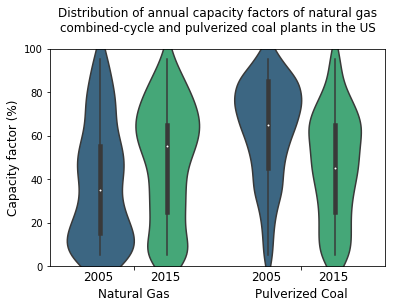

In [71]:
sns.violinplot(data=dh,x='Fuel',hue='Year',y='Capacity factor',palette="viridis")
plt.title('Distribution of annual capacity factors of natural gas\ncombined-cycle and pulverized coal plants in the US',y=1.05)
plt.xlabel('')
plt.ylabel('Capacity factor (%)',fontsize=12)
plt.legend().set_visible(False)
ax=plt.gca()
ax.text(0.1, -0.02, 2005,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes,size=12)
ax.text(0.3, -0.02, 2015,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes,size=12)
ax.text(0.6, -0.02, 2005,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes,size=12)
ax.text(0.8, -0.02, 2015,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes,size=12)
ax.text(0.75, -0.1, 'Pulverized Coal',
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax.transAxes,size=12)
ax.text(0.25, -0.1, 'Natural Gas',
                horizontalalignment='center',
                verticalalignment='top',
                transform=ax.transAxes,size=12)

plt.ylim(0,100)   
plt.savefig('plot/figS2b.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

[Denes Csala](https://csaladen.es) | MIT License | 2018